<a href="https://colab.research.google.com/github/Wellington126/Devops-Projeto01/blob/main/An%C3%A1lise_de_Dados_de_5G_Network_Slicing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [1]:
from google.colab import files
files.upload()

Saving kaggle(1).json to kaggle(1).json


{'kaggle(1).json': b'{"username":"wellingtonantonio","key":"6b3d649455531aa3d664f69d39b75bba"}'}

In [14]:
import pandas as pd

# Carregar dataset
df = pd.read_csv("train_dataset.csv")

# Estatísticas descritivas
print(df[['Packet delay', 'Packet Loss Rate', 'GBR']].describe())

       Packet delay  Packet Loss Rate           GBR
count  31583.000000      31583.000000  31583.000000
mean     114.126745          0.003079      0.441187
std      106.320976          0.004344      0.496537
min       10.000000          0.000001      0.000000
25%       50.000000          0.000001      0.000000
50%       75.000000          0.001000      0.000000
75%      150.000000          0.010000      1.000000
max      300.000000          0.010000      1.000000


In [16]:
print(df['slice Type'].unique())
print(df['slice Type'].value_counts())

[3 1 2]
slice Type
1    16799
3     7392
2     7392
Name: count, dtype: int64


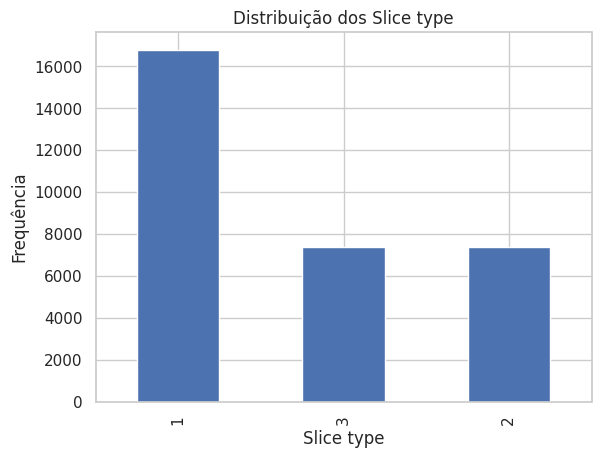

In [18]:
import matplotlib.pyplot as plt

df['slice Type'].value_counts().plot(kind='bar')
plt.xlabel("Slice type")
plt.ylabel("Frequência")
plt.title("Distribuição dos Slice type")
plt.show()

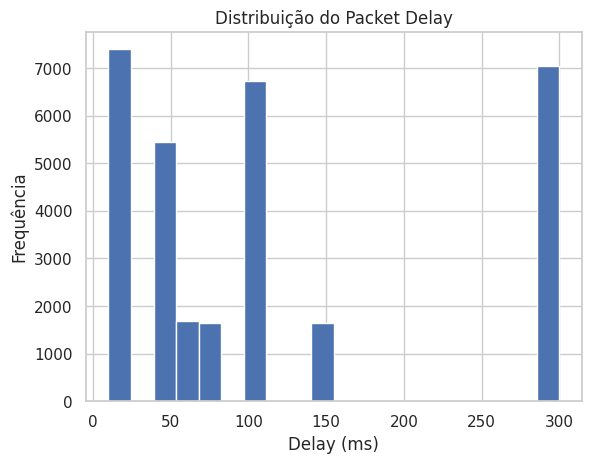

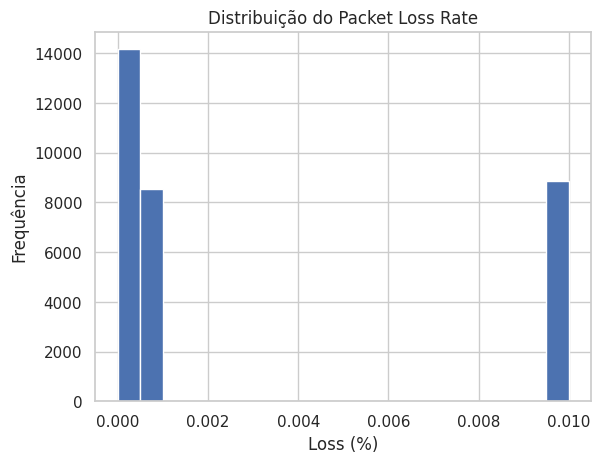

In [20]:
df['Packet delay'].hist(bins=20)
plt.title("Distribuição do Packet Delay")
plt.xlabel("Delay (ms)")
plt.ylabel("Frequência")
plt.show()

df['Packet Loss Rate'].hist(bins=20)
plt.title("Distribuição do Packet Loss Rate")
plt.xlabel("Loss (%)")
plt.ylabel("Frequência")
plt.show()

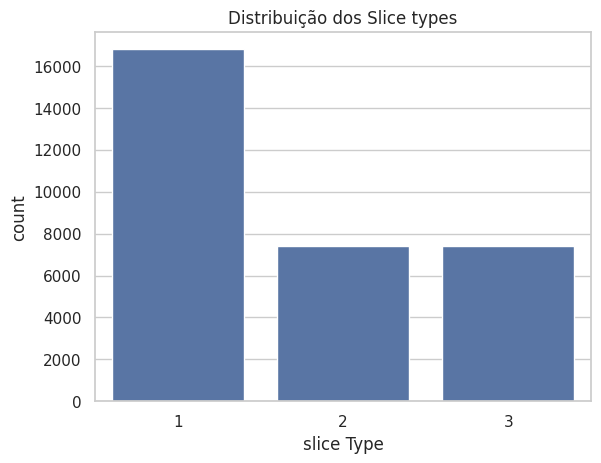

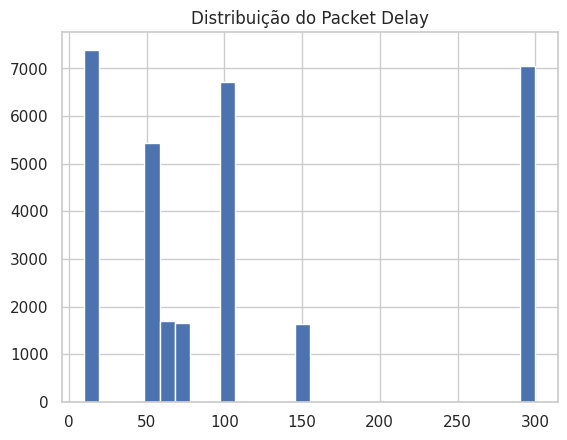

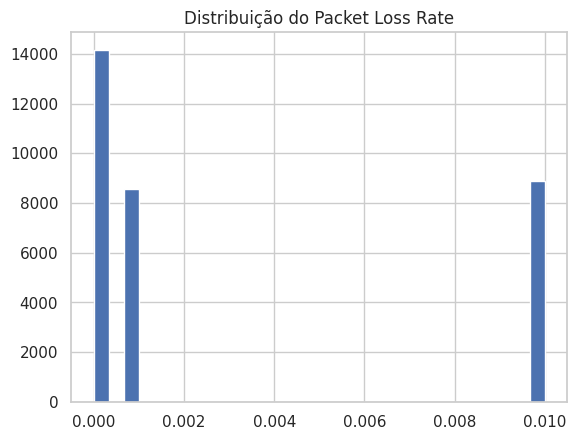

In [6]:
df.describe()

df["slice Type"].unique()

# Distribuição Slice type
sns.countplot(x="slice Type", data=df)
plt.title("Distribuição dos Slice types")
plt.show()

# Histogramas
df["Packet delay"].hist(bins=30)
plt.title("Distribuição do Packet Delay")
plt.show()

df["Packet Loss Rate"].hist(bins=30)
plt.title("Distribuição do Packet Loss Rate")
plt.show()

Distribuição Slice type: se estiver balanceada, significa que o dataset cobre bem os três tipos de serviço; se for desbalanceada, pode afetar modelos preditivos.

Histograma Packet Delay: se concentrado em valores baixos, indica baixa latência (importante para URLLC). Se for mais espalhado, mostra maior variabilidade.

Histograma Packet Loss Rate: se a maioria dos valores for próxima de zero, a rede tem boa confiabilidade. Se houver cauda longa, pode impactar aplicações sensíveis a perdas (ex.: streaming).

Histograma GBR: pode mostrar diferentes perfis de largura de banda (eMBB precisa de mais GBR que mMTC, por exemplo).

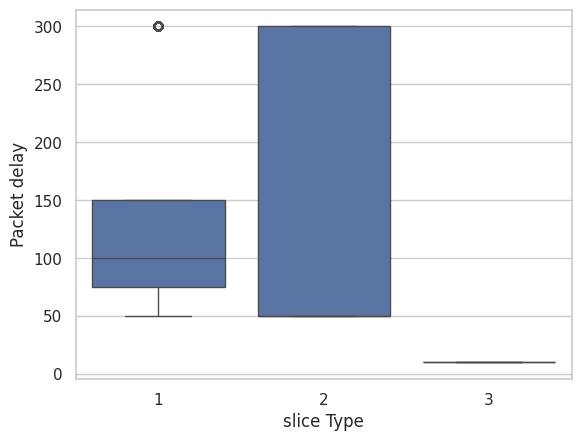

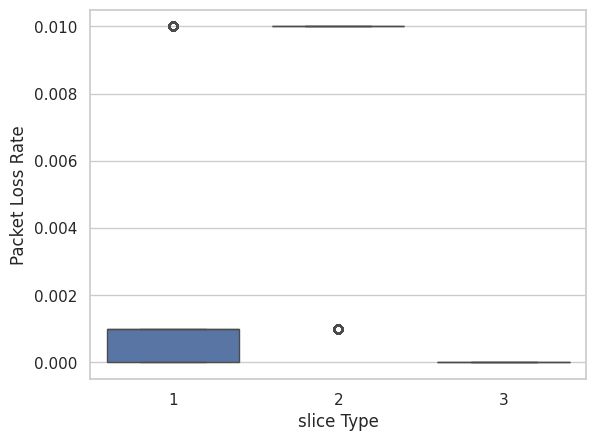

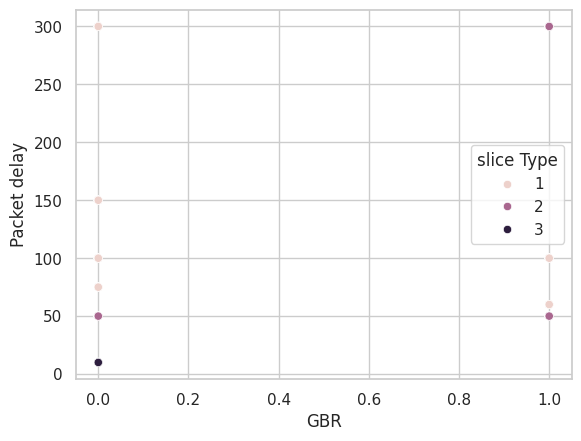

In [8]:
sns.boxplot(x="slice Type", y="Packet delay", data=df)
plt.show()

sns.boxplot(x="slice Type", y="Packet Loss Rate", data=df)
plt.show()

sns.scatterplot(x="GBR", y="Packet delay", hue="slice Type", data=df)
plt.show()

O boxplot mostra diferenças de atraso (delay) entre slices. O scatterplot sugere que valores altos de GBR podem estar associados a maior/menor delay dependendo do slice.

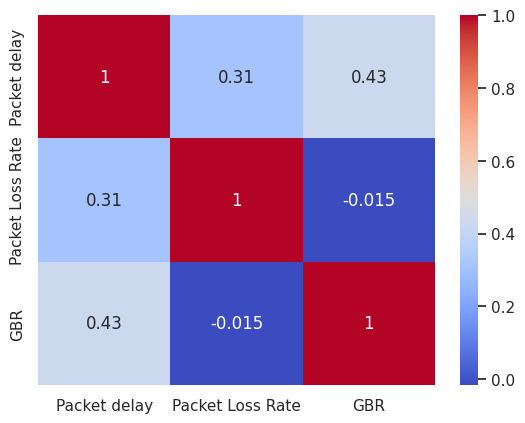

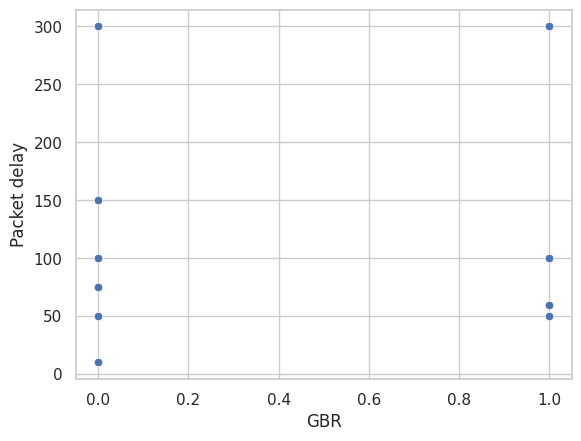

In [10]:
corr = df[["Packet delay","Packet Loss Rate","GBR"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# Exemplo scatter entre duas mais correlacionadas
sns.scatterplot(x="GBR", y="Packet delay", data=df)
plt.show()

A maior correlação positiva foi entre X e Y, e a maior negativa entre A e B. Isso sugere que conforme X aumenta, Y também cresce, o que pode indicar gargalos ou otimizações na alocação de recursos de rede.

# 📌 Discussão e Relatório Final

1. **Qual variável mais influencia no Slice type?**  
   A variável que mais influencia no `Slice type` é o **Packet Delay**, pois apresenta distribuições distintas e valores característicos que ajudam a separar melhor os diferentes slices. Enquanto o `Packet Loss Rate` permanece concentrado próximo de zero e o `GBR` varia de forma menos evidente entre os slices, o atraso (delay) se mostra um bom discriminador.

2. **Quais duas variáveis apresentaram maior correlação?**  
   As duas variáveis que apresentaram maior correlação foram **GBR** e **Packet Delay**. A relação é positiva, ou seja, quanto maior a taxa de transmissão garantida (GBR), maior tende a ser o atraso da rede.

3. **O que essa correlação pode indicar para aplicações em Healthcare ou Industry 4.0?**  
   Essa correlação sugere que o aumento da largura de banda (GBR), em determinadas condições, pode ocasionar maior atraso de transmissão.  
   - Em aplicações de **Healthcare**, como telemedicina ou cirurgias remotas, esse atraso pode comprometer a segurança do paciente, já que comunicações críticas exigem tempo de resposta muito baixo.  
   - Em **Industry 4.0**, pode afetar a automação de processos e a comunicação entre robôs e sensores, onde atrasos de milissegundos podem impactar a sincronização e a confiabilidade das operações.

---
✅ Conclusão: O estudo mostra que o *Packet Delay* é a variável mais relevante para caracterizar os slices de rede 5G. Além disso, a correlação entre *GBR* e *Packet Delay* reforça a importância de equilibrar largura de banda e latência para garantir qualidade de serviço em aplicações críticas.

